In [1]:
import pandas as pd
import numpy as np

In [2]:
import pickle
def save_data(data, outfile):
    with open(outfile, 'wb') as outf:
        pickle.dump(data, outf)

def load_data(infile):
    with open(infile, 'rb') as inf:
        data = pickle.load(inf)
    return data

In [3]:
x_train,y_train=load_data('train_data.pkl')
x_test1,y_test1,test1_star=load_data('test1_data.pkl')
x_test2,y_test2,test2_lab=load_data('test2_data.pkl')

### AF make bin

In [20]:
af_cut_off=0.01
x_train.loc[x_train['gnomad_genome_controls_AF_popmax']>af_cut_off,'AF']=0
x_train.loc[x_train['gnomad_genome_controls_AF_popmax']<=af_cut_off'AF']=1
x_test1.loc[x_test1['gnomad_genome_controls_AF_popmax']>af_cut_off,'AF']=0
x_test1.loc[x_test1['gnomad_genome_controls_AF_popmax']<=af_cut_off,'AF']=1
x_test2.loc[x_test2['gnomad_genome_controls_AF_popmax']>af_cut_off,'AF']=0
x_test2.loc[x_test2['gnomad_genome_controls_AF_popmax']<=af_cut_off,'AF']=1

In [21]:
x_train = x_train.drop(['gnomad_genome_controls_AF_popmax'], axis=1) 
x_test1 = x_test1.drop(['gnomad_genome_controls_AF_popmax'], axis=1) 
x_test2 = x_test2.drop(['gnomad_genome_controls_AF_popmax'], axis=1) 

In [22]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
def test_test2_auc(rfc,x_train, y_train,x_test,y_test,x_test2,y_test2):
    x_tra, x_val, y_tra, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=123)
    rfc.fit(x_tra, y_tra)
    y_val_pred_prob=rfc.predict_proba(x_val)[:,1]
    fpr, tpr, _ = roc_curve(y_val, y_val_pred_prob)
    val_auc= auc(fpr, tpr)
#     print('val auc ',val_auc)
    rfc.fit(x_train, y_train)
    y_test_pred_prob=rfc.predict_proba(x_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob)
    test1_auc=auc(fpr, tpr)
#     print('test1 auc ',test1_auc)
    y_test2_pred_prob=rfc.predict_proba(x_test2)[:,1]
    fpr2, tpr2, _ = roc_curve(y_test2, y_test2_pred_prob)
    test2_auc=auc(fpr2, tpr2)
#     print('test2 auc ',test2_auc)
    return val_auc,test1_auc,test2_auc
    
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=123)
test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)

(0.9948149520510194, 0.9950501354322498, 0.9585408600478593)

In [23]:
#loss loss{‘deviance’, ‘exponential’}, default=’deviance’
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=123,loss='exponential')
test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)

(0.9956448377553679, 0.9963561783172402, 0.9199662142006876)

In [24]:
loss='exponential'
#learning_ratefloat, default=0.1
from sklearn.ensemble import GradientBoostingClassifier
for para in [0.0001,0.001,0.01,0.2,0.3,0.4]:
    
    clf = GradientBoostingClassifier(random_state=123,loss=loss,
                                    learning_rate=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

0.0001 (0.9507183497065026, 0.9627633930595223, 0.14329174519504947)
0.001 (0.9552788580822322, 0.9627633930595223, 0.14329174519504947)
0.01 (0.9884518059322733, 0.9960971938891156, 0.8505478529103104)
0.2 (0.9962704367461824, 0.9957690285144386, 0.9324126790611545)
0.3 (0.9962280342042005, 0.9956972437553834, 0.946242120346195)
0.4 (0.9963211337525009, 0.9938381017951856, 0.9520100075537571)


In [25]:

#learning_ratefloat, default=0.1
from sklearn.ensemble import GradientBoostingClassifier
for para in [0.5,0.6,0.7,0.8,0.9]:
    
    clf = GradientBoostingClassifier(random_state=123,loss=loss,
                                    learning_rate=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#0.7 (0.9966599406571128, 0.9950980240491409, 0.9314274287349055)

0.5 (0.9962845192479376, 0.9923956208350333, 0.8981420129823154)
0.6 (0.9963340534788819, 0.9948555606555147, 0.9011672739110704)
0.7 (0.9966599406571128, 0.9950980240491409, 0.9314274287349055)
0.8 (0.9962162255742882, 0.9920969672242622, 0.8987832367661277)
0.9 (0.9962563025655218, 0.9931197725418197, 0.9064106582667133)


In [26]:
learning_rate=0.7
#n_estimatorsint, default=100
from sklearn.ensemble import GradientBoostingClassifier
for para in [10,20,40,60,80,100,120,140,160,180,200,300]:
    
    clf = GradientBoostingClassifier(random_state=123,loss=loss,learning_rate=learning_rate,
                                    n_estimators=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)
    
#100 (0.9966599406571128, 0.9950980240491409, 0.9314274287349055)

10 (0.9948348742690989, 0.9954395541502336, 0.8298713806088291)
20 (0.9959593038954785, 0.9959405939752483, 0.9336234733941455)
40 (0.9963971017436204, 0.9957835577315381, 0.9414122431229337)
60 (0.9965997864110835, 0.9945067971122898, 0.9255375357840452)
80 (0.9965356012104233, 0.9950061964504284, 0.9271876300650806)
100 (0.9966599406571128, 0.9950980240491409, 0.9314274287349055)
120 (0.9966302769653425, 0.995056734212793, 0.9023633001321907)
140 (0.9965584949655701, 0.9951931241216737, 0.9172865505777591)
160 (0.9964994001371043, 0.9935316650800127, 0.8698565719800708)
180 (0.9964146984109512, 0.9939760953579039, 0.887975885522999)
200 (0.9962962761989442, 0.9942229985493449, 0.9063333091797878)
300 (0.9961716525182744, 0.9949725168865317, 0.9239833901900747)


In [27]:
n_estimators=100
#subsamplefloat, default=1.0
from sklearn.ensemble import GradientBoostingClassifier
for para in [0.2,0.5,0.6,0.7,0.8,0.9]:
    clf = GradientBoostingClassifier(random_state=123,
                                     loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,
                                    subsample=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

0.2 (0.9951910452859665, 0.9940766353869169, 0.9188137142735003)
0.5 (0.9959106223664752, 0.9942130961285643, 0.947777446139551)
0.6 (0.9957066974052797, 0.9950998997008024, 0.9441333191152335)
0.7 (0.9962026598615883, 0.9923553169907974, 0.8920046440573822)
0.8 (0.9957495650574114, 0.9946690041479669, 0.9492979010608142)
0.9 (0.9962724263840449, 0.9950305742554059, 0.9204216181434857)


In [28]:
subsample=1
#criterion{‘friedman_mse’, ‘squared_error’, ‘mse’, ‘mae’}, default=’friedman_mse’
from sklearn.ensemble import GradientBoostingClassifier
for para in ['squared_error']:
    clf = GradientBoostingClassifier(random_state=123,
                                     loss=loss,learning_rate=learning_rate,
                                     n_estimators=n_estimators,subsample=subsample,
                                    criterion=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

squared_error (0.9966599406571128, 0.9950980297157622, 0.9314274287349055)


In [29]:
criterion='friedman_mse'
#(0.9953899057144209, 0.9878844972573553, 0.93855434923537)
#min_samples_splitint or float, default=2
from sklearn.ensemble import GradientBoostingClassifier
for para in [2,4,6,8,10,20]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,
            min_samples_split=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

2 (0.9966599406571128, 0.9950980240491409, 0.9314274287349055)
4 (0.9967071234978558, 0.9941203363706423, 0.9242227040665332)
6 (0.9967357277720629, 0.9954318758783263, 0.9144088239673948)
8 (0.9967357277720628, 0.9952028763769891, 0.9310843123544329)
10 (0.9968646924807967, 0.9945430011559907, 0.9198381456043053)
20 (0.9964456799148126, 0.994534665556009, 0.8800940443933554)


In [30]:
criterion='friedman_mse'
#(0.9953899057144209, 0.9878844972573553, 0.93855434923537)
#min_samples_splitint or float, default=2
from sklearn.ensemble import GradientBoostingClassifier
for para in [12,14,16,18]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,
            min_samples_split=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#10 (0.9968646924807967, 0.9945430011559907, 0.9198381456043053)

12 (0.9965275651406144, 0.994682048710277, 0.9107255893386799)
14 (0.9968505324606833, 0.9947361847771885, 0.9111371880669428)
16 (0.9966966326800346, 0.9946021011831905, 0.9221888443973014)
18 (0.9960771834789774, 0.994534665556009, 0.8800940443933554)


In [31]:
min_samples_split=10
#max_depthint, default=3
from sklearn.ensemble import GradientBoostingClassifier
for para in [2,4,5,6,8,10,20,40]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,min_samples_split=min_samples_split,
            max_depth=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

2 (0.9955086121604083, 0.9955441486468108, 0.9387537627857203)
4 (0.9962770516460893, 0.9947745846366562, 0.9279000520025442)
5 (0.9959943680328759, 0.994009704089034, 0.8948255295850789)
6 (0.9958697443522062, 0.9937471638560225, 0.8642260164688816)
8 (0.9945543611699174, 0.9946332449340405, 0.9002772235902706)
10 (0.9919264371451435, 0.9954822323088083, 0.9534675144991736)
20 (0.9819926920859698, 0.9923039320685434, 0.8927121922243277)
40 (0.9817703952738608, 0.988693376286323, 0.8200043587950065)


In [32]:
max_depth=3
#min_samples_leafint or float, default=1
from sklearn.ensemble import GradientBoostingClassifier
for para in [0.0001,0.001,0.01,0.1,0.2,0.3,0.4 ,0.5]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,min_samples_split=min_samples_split,max_depth=max_depth,
            min_samples_leaf=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

0.0001 (0.9964143366586126, 0.9909516212203635, 0.886532691608471)
0.001 (0.9963007464242718, 0.9943674520603835, 0.9361361663367379)
0.01 (0.9960800774976867, 0.9941776769119182, 0.822046145681346)
0.1 (0.9920903626334638, 0.9910302597579219, 0.9337444808952894)
0.2 (0.9834609156313444, 0.9729163946688426, 0.9260989442356096)
0.3 (0.8421712272008819, 0.7412680453556372, 0.5420109770230492)
0.4 (0.8257915464163135, 0.7618062497166689, 0.4292954330538882)
0.5 (0.5, 0.5, 0.5)


In [33]:
min_samples_leaf=1
#
#min_weight_fraction_leaffloat, default=0.0
from sklearn.ensemble import GradientBoostingClassifier
for para in [0.001,0.01,0.1,0.2,0.5]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,min_samples_split=min_samples_split,max_depth=max_depth,                     
            min_samples_leaf=min_samples_leaf,
            min_weight_fraction_leaf=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

0.001 (0.9963007464242718, 0.9943674520603835, 0.9361361663367379)
0.01 (0.9960800774976867, 0.9941776769119182, 0.822046145681346)
0.1 (0.9920903626334638, 0.9910302597579219, 0.9337444808952894)
0.2 (0.9834609156313444, 0.9729163946688426, 0.9260989442356096)
0.5 (0.5, 0.5, 0.5)


In [34]:
min_weight_fraction_leaf=0
#min_impurity_decreasefloat, default=0.0
from sklearn.ensemble import GradientBoostingClassifier
for para in [0.001,0.01,0.1,0.2]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,min_samples_split=min_samples_split,max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,min_weight_fraction_leaf=min_weight_fraction_leaf,
            min_impurity_decrease=para                        )
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

0.001 (0.9968646924807967, 0.9945430011559907, 0.9198381456043053)
0.01 (0.9968646924807967, 0.9945430011559907, 0.9198381456043053)
0.1 (0.9968645374440802, 0.9943540250011333, 0.9562696536264141)
0.2 (0.996655909702482, 0.9949109717122262, 0.9390338284301244)


In [35]:
min_impurity_decrease=0
#max_features{‘auto’, ‘sqrt’, ‘log2’}, int or float, default=None
from sklearn.ensemble import GradientBoostingClassifier
for para in ['auto','sqrt','log2',2,4,6,8,10,20]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,min_samples_split=min_samples_split,max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,min_weight_fraction_leaf=min_weight_fraction_leaf,
            min_impurity_decrease=min_impurity_decrease,
            max_features=para                        )
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

auto (0.9968646924807967, 0.9945430011559907, 0.9198381456043053)
sqrt (0.9953299323445609, 0.9956276746452695, 0.9587331537828445)
log2 (0.9958210111442976, 0.9951741381068953, 0.9494027752071412)
2 (0.9948724965123199, 0.9955968623917676, 0.9515947828576691)
4 (0.9958210111442976, 0.9951741381068953, 0.9494027752071412)
6 (0.9960396387541146, 0.9946969094247246, 0.9235832565665544)
8 (0.9961473892721311, 0.9942387857563806, 0.924993728690466)
10 (0.9961263042786774, 0.9940483957795004, 0.9304745331984806)
20 (0.9962551139506947, 0.9935450099732536, 0.8995698075436102)


In [36]:
max_features=None
#
#max_leaf_nodesint, default=None
from sklearn.ensemble import GradientBoostingClassifier
for para in [2,4,6,8,10,20]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,min_samples_split=min_samples_split,max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,min_weight_fraction_leaf=min_weight_fraction_leaf,
            min_impurity_decrease=min_impurity_decrease,
            max_features=max_features,                        
            max_leaf_nodes=para                        )
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

2 (0.9943182660900334, 0.9966776287456367, 0.9646993388583492)
4 (0.9963200226560321, 0.994021779659096, 0.9378128167950838)
6 (0.9961159684975727, 0.9952454978693505, 0.9481007297972229)
8 (0.9968646924807967, 0.9945336852305181, 0.9196720850859335)
10 (0.9968646924807967, 0.9945336852305181, 0.9196720850859335)
20 (0.9968646924807967, 0.9945336852305181, 0.9196720850859335)


In [37]:
#
max_leaf_nodes=None
#tolfloat, default=1e-4
from sklearn.ensemble import GradientBoostingClassifier
for para in [1e-6,1e-5,1e-3,1e-2,1e-1]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,min_samples_split=min_samples_split,max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,min_weight_fraction_leaf=min_weight_fraction_leaf,
            min_impurity_decrease=min_impurity_decrease,
            max_features=max_features,                        
            max_leaf_nodes=max_leaf_nodes,
            tol=para                        )
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

1e-06 (0.9968646924807967, 0.9945430011559907, 0.9198381456043053)
1e-05 (0.9968646924807967, 0.9945430011559907, 0.9198381456043053)
0.001 (0.9968646924807967, 0.9945430011559907, 0.9198381456043053)
0.01 (0.9968646924807967, 0.9945430011559907, 0.9198381456043053)
0.1 (0.9968646924807967, 0.9945430011559907, 0.9198381456043053)


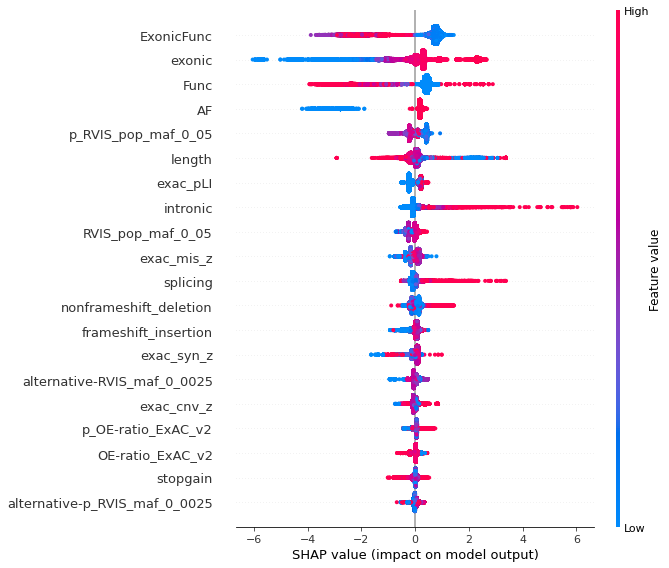

In [38]:
clf=GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,min_samples_split=min_samples_split,max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,min_weight_fraction_leaf=min_weight_fraction_leaf,
            min_impurity_decrease=min_impurity_decrease,
            max_features=max_features,                        
            max_leaf_nodes=max_leaf_nodes,                        
            )
import shap
clf.fit(x_train,y_train)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(x_train)
#shap.summary_plot(shap_values, x_train)
shap.summary_plot(shap_values, x_train)

In [39]:
shap_df=pd.DataFrame()
shap_df['feature']=x_train.columns.to_list()
shap_df['importance']=np.mean(np.abs(shap_values),axis=0)
shap_df=shap_df.sort_values(by=['importance'],ascending=False)

In [40]:
shap_df

,feature,importance
1,ExonicFunc,1.080914
3,exonic,0.737885
0,Func,0.717287
28,AF,0.417305
23,p_RVIS_pop_maf_0_05,0.261783
2,length,0.182324
20,exac_pLI,0.180543
6,intronic,0.177116
22,RVIS_pop_maf_0_05,0.148356
18,exac_mis_z,0.130119


In [41]:
##
for num in range(28):
    num_sel=shap_df.iloc[:num+1,0].to_list()
    x_train_num=x_train[num_sel]
    x_test1_num=x_test1[num_sel]
    x_test2_num=x_test2[num_sel]
    out=test_test2_auc(clf,x_train_num, y_train,x_test1_num,y_test1,x_test2_num,y_test2)
    print(num+1,out)

1 (0.9453481362390315, 0.9752630587288635, 0.9404777563462364)
2 (0.9826298929910744, 0.9383934051860919, 0.06843481384780306)
3 (0.9896412217823486, 0.9665729209166326, 0.06812453669820015)
4 (0.9931757488467207, 0.9734777896776827, 0.16520731493060217)
5 (0.9938134407014275, 0.9802519408178069, 0.21179244302503547)
6 (0.9948361662417369, 0.9871439775148465, 0.4186585022985406)
7 (0.9945401753103512, 0.9866329502697312, 0.4185816229726289)
8 (0.995756024920602, 0.9927652772111156, 0.8618029157596364)
9 (0.9958159466115563, 0.9913190846139899, 0.7381365085576364)
10 (0.9958546541117933, 0.9957752447980416, 0.892153426178466)
11 (0.9958169543502139, 0.993808255700621, 0.8128998253428552)
12 (0.9959969002992467, 0.9921724551203591, 0.8684434280903934)
13 (0.9959994842445229, 0.9906846610227117, 0.8646653310969578)
14 (0.9958975992822834, 0.9924121588693957, 0.8057637591826534)
15 (0.9961232552232516, 0.9922620472369553, 0.8192099488806065)
16 (0.996038398460382, 0.9921822782084411, 0.794

In [43]:
test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)

(0.9968646924807967, 0.9945430011559907, 0.9198381456043053)

In [45]:
#x_test1[test1_star>=2]
test_test2_auc(clf,x_train, y_train,
               x_test1[test1_star>=2],y_test1[test1_star>=2],
               x_test2[test2_lab.astype('int')>=2],y_test2[test2_lab.astype('int')>=2])

(0.9968646924807967, 0.9966881489437881, 0.9103652609998938)